In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
session = pd.read_csv('../../airbnb_project_data/sessions.csv')
session.action.value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
ajax_refresh_subtotal         487744
update                        365130
similar_listings              364624
social_connections            339000
reviews                       320591
active                        188036
similar_listings_v2           168788
lookup                        162041
create                        155887
dashboard                     152952
header_userpic                141830
collections                   124417
edit                          109083
campaigns                     105028
track_page_view                81117
unavailabilities               78317
qt2                            64651
notifications                  59392
confirm_email                  58726
requested                      57034
identity                       53631
ajax_check_dates               52517
s

In [4]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [2]:
test = pd.read_csv('../../airbnb_project_data/test_users.csv')
test.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [3]:
train = pd.read_csv('../../airbnb_project_data/train_users_2.csv')
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [61]:
train.loc[train.age > 95, 'age'] = np.nan
train.loc[train.age < 18, 'age'] = np.nan

In [17]:
train.gender.replace('-unknown-', np.nan, inplace=True)
train_nan = (train.isnull().sum() / train.shape[0]) * 100
train_nan[train_nan > 0]

date_first_booking         58.347349
gender                     44.829024
age                        41.222576
first_affiliate_tracked     2.841402
dtype: float64

       country_destination
NDF                 124543
US                   62376
other                10094
FR                    5023
IT                    2835
GB                    2324
ES                    2249
CA                    1428
DE                    1061
NL                     762
AU                     539
PT                     217


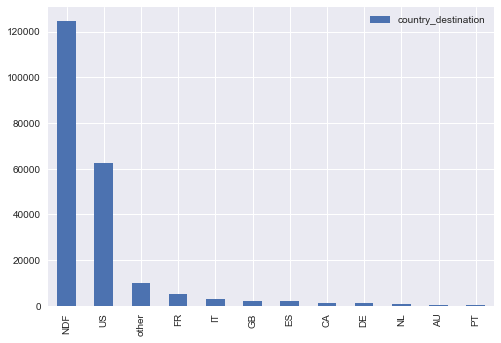

In [54]:
country_dis = pd.DataFrame(train.country_destination.value_counts())
print(country_dis)
country_dis.plot(kind='bar')

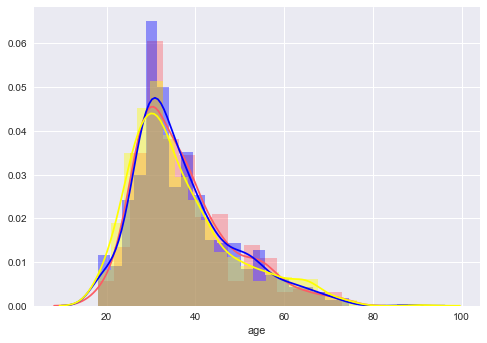

In [72]:
au = train[train.country_destination == 'AU']
ca = train[train.country_destination == 'CA']
de = train[train.country_destination == 'DE']
#es = a.ES
#fr = a.FR
#gb = a.GB
#it = a.IT
#ndf = a.NDF
#nl = a.NL
#pt = a.PT
#us = a.US
#other = a.other
sns.distplot(au.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()
sns.distplot(ca.age.dropna(), color='blue')
sns.distplot(de.age.dropna(), color='yellow')

In [94]:
date = train.date_account_created
year = []
month = []
day = []
for i in date:
    y, m, d = i.split('-')
    year.append(y)
    month.append(m)
    day.append(d)

In [95]:
#train['account_create_year'] = year
#train['account_create_month'] = month
#train['account_create_day'] = day

In [96]:
date2 = train.date_first_booking
year2 = []
month2 = []
day2 = []
for i in date2:
    if type(i) == float:
        y = m = d = np.nan
    else:
        y, m, d = i.split('-')
    year2.append(y)
    month2.append(m)
    day2.append(d)

In [97]:
date2.value_counts(dropna = False)[0]

124543

In [98]:
a = 0
for i in date2:
    if type(i) != float:
        pass
    else:
        a += 1
a

124543

In [99]:
np.nan == np.nan

False

In [100]:
#train['first_booking_year'] = year2
#train['first_booking_month'] = month2
#train['first_booking_day'] = day2

In [106]:
train.gender.replace('-unknown-', 'Nan', inplace=True)
train.gender.replace('OTHER', 'Nan', inplace=True)
a = train.groupby(['gender', 'country_destination']).size().unstack(0)

In [107]:
a

gender,FEMALE,MALE,Nan
country_destination,,,
AU,207,188,144
CA,455,477,496
DE,358,416,287
ES,853,677,719
FR,1962,1335,1726
GB,881,682,761
IT,1091,699,1045
NDF,31048,26719,66776
NL,254,278,230


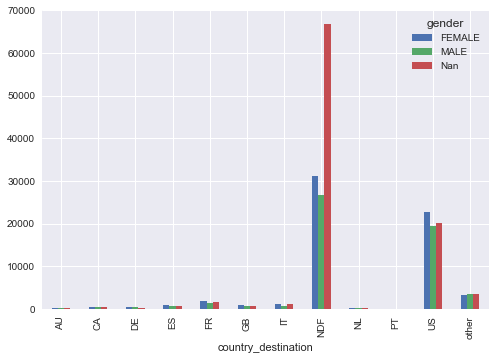

In [108]:
a.plot(kind='bar')

In [110]:
train.gender.value_counts()

Nan       95970
FEMALE    63041
MALE      54440
Name: gender, dtype: int64

In [19]:
year3 = []
month3 = []
day3 = []
for i in train.timestamp_first_active:
    year3.append(int(str(i)[0:4]))
    month3.append(int(str(i)[4:6]))
    day3.append(int(str(i)[6:8]))

In [23]:
a = pd.Series(year3)
a.value_counts()

2013    82950
2014    76430
2012    39475
2011    11794
2010     2797
2009        5
dtype: int64

In [24]:
train.signup_method.value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

In [25]:
train.signup_flow.value_counts()
#number

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [26]:
train.language.value_counts()
#can be recombined as english and other?

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
th        24
el        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

(0, 5000)

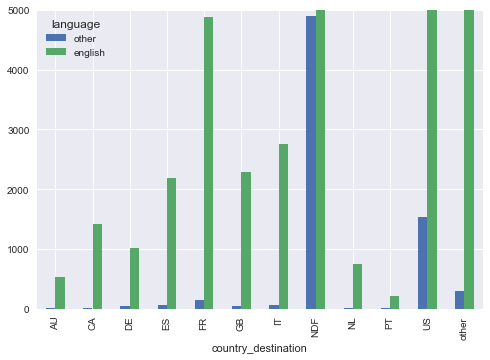

In [61]:
b = train.groupby(['language', 'country_destination']).size().unstack(0)
b.replace(np.nan, 0, inplace=True)
b['other'] = b.zh + b.fr + b.es + b.ko + b.de + b.it + b.ru + b.pt + b.ja + b.sv + b.nl + b.tr + b.da + b.pl + b.cs + b.no + b.th + b.el + b.id + b.hu + b.fi + b['is'] + b.ca + b.hr
b['english'] = b.en
b.drop(b.columns[0:25], axis=1).plot(kind='bar')
plt.ylim(0, 5000)

In [27]:
train.affiliate_channel.value_counts()

direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64

In [28]:
train.first_affiliate_tracked.value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [29]:
train.signup_app.value_counts()

Web        182717
iOS         19019
Moweb        6261
Android      5454
Name: signup_app, dtype: int64

In [62]:
train.first_device_type.value_counts()
#combine desktop(other) and smartphone(other)

Mac Desktop           89600
Windows Desktop       72716
iPhone                20759
iPad                  14339
Other/Unknown         10667
Android Phone          2803
Android Tablet         1292
Desktop (Other)        1199
SmartPhone (Other)       76
Name: first_device_type, dtype: int64

In [66]:
train.groupby(['first_device_type', 'country_destination']).size().unstack()

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
first_device_type,,,,,,,,,,,,
Android Phone,1.0,13.0,4.0,13.0,17.0,3.0,13.0,2088.0,5.0,NaN,565.0,81.0
Android Tablet,2.0,11.0,5.0,11.0,23.0,5.0,17.0,832.0,5.0,2.0,314.0,65.0
Desktop (Other),4.0,18.0,13.0,11.0,24.0,8.0,13.0,649.0,5.0,NaN,394.0,60.0
Mac Desktop,265.0,679.0,553.0,1098.0,2593.0,1197.0,1379.0,47350.0,399.0,111.0,29575.0,4401.0
Other/Unknown,18.0,49.0,25.0,61.0,165.0,52.0,57.0,7792.0,19.0,5.0,2141.0,283.0
SmartPhone (Other),NaN,NaN,NaN,NaN,2.0,NaN,1.0,51.0,NaN,NaN,20.0,2.0
Windows Desktop,171.0,520.0,339.0,773.0,1576.0,764.0,969.0,42564.0,222.0,76.0,20910.0,3832.0
iPad,42.0,78.0,62.0,152.0,356.0,159.0,225.0,8875.0,68.0,12.0,3642.0,668.0
iPhone,36.0,60.0,60.0,130.0,267.0,136.0,161.0,14342.0,39.0,11.0,4815.0,702.0


In [63]:
train.first_browser.value_counts()
#combine size < 20 as others?

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
CometBird                  11
SeaMonkey                  11
Yandex.Browser             11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Avant Browser               4
Opera Mini                  4
Mozilla                     3
Flock     